In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime, timedelta

//anaconda3/lib/python3.7/site-packages/pandas/compat/_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


### Import my functions from the MRT_Funcs file

In [2]:
from ipynb.fs.full.MRT_Funcs import SMAMeanReversion_strat, stratBacktest, applyPortfolioStrat, getStratStats, portfolio_DrawdownStats, portfolioBacktest, sum_metrics, plot_portfolio_backtest, portfolio_dashboard

### Run a single-stock backtest

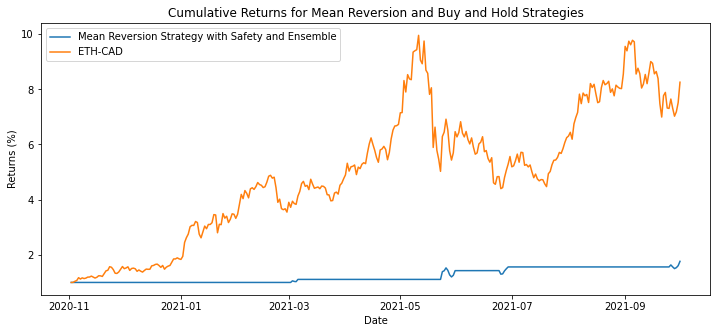

Safe+Ensemble Strategy Statistics 

                       strat_stats  base_stats
tot_returns                  0.765       6.894
annual_returns               0.535       3.753
annual_volatility            0.327       0.922
max_drawdown                 0.327       5.997
max_drawdown_duration       34.000     143.000


In [3]:
#Set strategy params
ticker = 'ETH-CAD'
start_date = '2020-11-30'
end_date = '2021-10-01'
strat='SMA_MR'
verbose = False
safety = True
SMA = 15
threshold = 0.10
safety_threshold = 0.15
short_term_sma=10
long_term_sma=30
short_long_threshold=0.05
#Pack the strategy settings
strat_settings1 = [ticker, strat, SMA, threshold, safety, safety_threshold, short_term_sma, long_term_sma, short_long_threshold, start_date,end_date]

#Run the backtest
data_safe_ensemble = stratBacktest(strat_settings1)
safe_ensemble_stats_dict = getStratStats(data_safe_ensemble)
df_safe_ensemble_stats = pd.DataFrame(safe_ensemble_stats_dict).round(3)

#Normalize backtest results
first_valid_day = data_safe_ensemble.first_valid_index()
data_normalized = data_safe_ensemble/data_safe_ensemble.loc[first_valid_day]

#Plot the results
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(data_normalized['strat_cum_returns'], label='Mean Reversion Strategy with Safety and Ensemble')
ax.plot(data_normalized['cum_returns'], label=f'{ticker}')
ax.set_xlabel('Date')
ax.set_ylabel('Returns (%)')
ax.set_title('Cumulative Returns for Mean Reversion and Buy and Hold Strategies')

ax.legend()
plt.show()

print('Safe+Ensemble Strategy Statistics \n')
print(df_safe_ensemble_stats)

### Get portfolio decisions for today

In [11]:
#List of stocks we want to consider in our portfolio
#tickers = ['ETH-CAD','BTC-CAD','ADA-CAD','BNB-CAD','SNP','GOOGL','AAPL']
tickers = ['BTC-CAD','CRV-CAD','COMP-CAD','ETH-CAD','LINK-CAD']
#tickers = ['AAVE-CAD','BAL-CAD','BAT-CAD','BCH-CAD','BTC-CAD','COMP-CAD','CRV-CAD','DOGE-CAD','ETH-CAD','FIL-CAD','KNC-CAD','LINK-CAD','LTC-CAD','MANA-CAD','MATIC-CAD','MKR-CAD','SNX-CAD','SUSHI-CAD','UMA-CAD','UNI3-CAD','YFI-CAD','ZRX-CAD']
#tickers = ['TSLA','AAPL','TD','AMZN','SHOP','MSFT','RY','BNS','NVDA','CNR','BMO','FTS','ARKK','ABNB','NFLX','COIN','FB','BCE','VOO','DOL','SQ','KO','GOOGL','WMT']
current_positions = [0]*len(tickers)

#Set strategy params
strat_func = SMAMeanReversion_strat
SMA = 15 #have to make sure this is less than 2*long_term_sma, otherwise not enough data is downloaded and extension returns nan
threshold = 0.1
safety = False
safety_threshold = 0.15
short_term_sma=10
long_term_sma=30
short_long_threshold=0.05
tp_threshold = 0.7
#Pack the strategy settings
strat_settings2 = [strat_func, tickers, current_positions, SMA, threshold, safety, safety_threshold, short_term_sma, long_term_sma, short_long_threshold, tp_threshold]

#Apply strategy to portfolio
decisions = applyPortfolioStrat(strat_settings2)
portfolio_dashboard(decisions)

,ticker,latest_close_price,expected_price,extension,extension_position,short_long ratio,short_long_position,movement,take_profit_price,position
0,BTC-CAD,77424.414,67610.940,0.083,0.000,1.152,0.000,Hold,0,0.000
1,CRV-CAD,3.505,3.436,-0.009,0.000,1.050,0.000,Hold,0,0.000
2,COMP-CAD,382.720,396.094,-0.013,0.000,0.948,1.000,Hold,0,0.000
3,ETH-CAD,4734.664,4382.762,0.041,0.000,1.088,0.000,Hold,0,0.000
4,LINK-CAD,32.346,32.347,-0.014,0.000,1.013,0.000,Hold,0,0.000


### Run a portfolio backtest

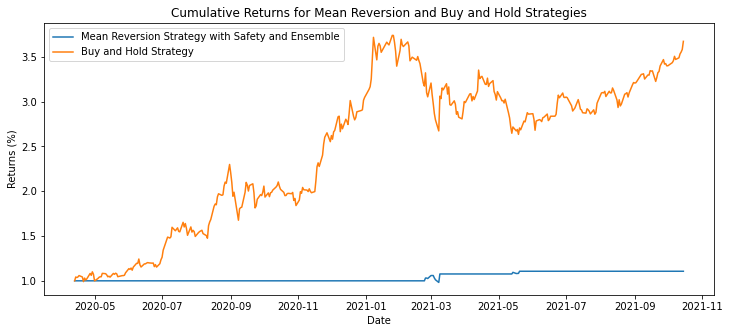

Portfolio Backtest Statistics


,strat_stats,base_stats
tot_returns,0.107,3.278
annual_returns,0.068,1.422
annual_volatility,0.091,0.476
max_drawdown,0.077,1.028
max_drawdown_duration,6.000,263.000


In [5]:
#List of stocks we want to consider in our portfolio
#tickers = ['AAVE-CAD','BAL-CAD','BAT-CAD','BCH-CAD','BTC-CAD','COMP-CAD','CRV-CAD','DOGE-CAD','ETH-CAD','FIL-CAD','KNC-CAD','LINK-CAD','LTC-CAD','MANA-CAD','MATIC-CAD','MKR-CAD','SNX-CAD','SUSHI-CAD','UMA-CAD','UNI3-CAD','YFI-CAD','ZRX-CAD']
#tickers = ['TSLA','AAPL','TD','AMZN','SHOP','MSFT','RY','BNS','NVDA','CNR','BMO','FTS','ARKK','NFLX','FB','BCE','VOO','DOL','SQ','KO','GOOGL','WMT']
#tickers = ['SNP','GOOGL','AAPL','TD','AMZN','BMO','CNR','NVDA','ARKK','NFLX','FB','VOO','GOOGL','WMT']
#tickers = ['BAL-CAD','BAT-CAD','BCH-CAD','BTC-CAD','COMP-CAD']
tickers = ['SNP','TSLA']
verbose = False

start_date = '2020-05-01'
end_date = '2021-10-17'
strat='SMA_MR'
SMA = 15
threshold = 0.1
safety = False
safety_threshold = 0.15
short_term_sma=10
long_term_sma=30
short_long_threshold=0.05

strat_settings3 = [tickers, strat, SMA, threshold, safety, safety_threshold, short_term_sma, long_term_sma, short_long_threshold, start_date, end_date, verbose]
#Run the backtest on the entire portfolio
portfolio_returns, portfolio_stats = portfolioBacktest(strat_settings3)
#Plot portfolio backtest returns
plot_portfolio_backtest(portfolio_returns)
#Print portfolio backtest statistics
print('Portfolio Backtest Statistics')
round(portfolio_stats,3)

In [6]:
start_date = '2021-10-11'
end_date = '2021-10-19'
ticker = 'TSLA'
yfObj = yf.Ticker(ticker)
data = yfObj.history(start=start_date, end=end_date)

print(yfObj.info['regularMarketPrice']) #yfObj.info call is pretty slow, would be nice if there's a faster way to get current price
print(data['Close'])
print(yfObj.history('5d'))

870.11
Date
2021-10-11    791.940002
2021-10-12    805.719971
2021-10-13    811.080017
2021-10-14    818.320007
2021-10-15    843.030029
2021-10-18    870.109985
Name: Close, dtype: float64
                  Open        High         Low       Close    Volume  \
Date                                                                   
2021-10-12  800.929993  812.320007  796.570007  805.719971  22020000   
2021-10-13  810.469971  815.409973  805.780029  811.080017  14120100   
2021-10-14  815.489990  820.250000  813.349976  818.320007  12247200   
2021-10-15  823.739990  843.210022  822.349976  843.030029  18818000   
2021-10-18  851.789978  875.260010  851.469971  870.109985  24141100   

            Dividends  Stock Splits  
Date                                 
2021-10-12          0             0  
2021-10-13          0             0  
2021-10-14          0             0  
2021-10-15          0             0  
2021-10-18          0             0  
